In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from functools import partial

import numpy as np
import jax
import jax.numpy as jnp
from jax import random
import wandb
import matplotlib
import matplotlib.pyplot as plt

import src.data
from src.models import make_Hard_OvR_Ens_loss as make_loss
from src.models import make_Hard_OvR_Ens_plots as make_plots
from src.data import NumpyLoader
from src.utils.training import setup_training, train_loop
from experiments.configs.spirals_hard_ovr_classification import get_config

In [3]:
os.environ['WANDB_NOTEBOOK_NAME'] = 'train_hard_ivr_classifier_spirals.ipynb'
# ^ W&B doesn't know how to handle VS Code notebooks.

wandb.login()

wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find train_hard_ivr_classifier_spirals.ipynb.
wandb: Currently logged in as: jamesallingham (invariance-learners). Use `wandb login --relogin` to force relogin


True

In [4]:
rng = random.PRNGKey(0)

In [5]:
config = get_config()

In [6]:
data_gen_fn = getattr(src.data, config.dataset_name)
train_dataset, test_dataset, val_dataset = data_gen_fn(**config.dataset.to_dict())
train_loader = NumpyLoader(train_dataset, config.batch_size)
val_loader = NumpyLoader(val_dataset, config.batch_size)
test_loader = NumpyLoader(test_dataset, config.batch_size)

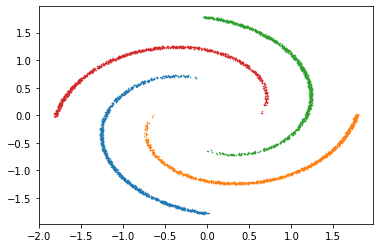

In [7]:
X_train, y_train = zip(*train_loader.dataset)
X_train, y_train = jnp.array(X_train), jnp.array(y_train)

for i in range(config.n_classes):
    idxs = (y_train == i)

    plt.plot(X_train[idxs[:, 0], 0], X_train[idxs[:, 0], 1], '.', c=f'C{i}', alpha=1, ms=1)

In [8]:
setup_rng, rng = random.split(rng)
init_x = train_dataset[0][0]
init_y = train_dataset[0][1]

model, state = setup_training(config, setup_rng, init_x, init_y)

+---------------------------------------------+------------+--------+-----------+--------+
| Name                                        | Shape      | Size   | Mean      | Std    |
+---------------------------------------------+------------+--------+-----------+--------+
| batch_stats/nets_0/layer_0/BatchNorm_0/mean | (100,)     | 100    | 0.0       | 0.0    |
| batch_stats/nets_0/layer_0/BatchNorm_0/var  | (100,)     | 100    | 1.0       | 0.0    |
| batch_stats/nets_0/layer_1/BatchNorm_0/mean | (100,)     | 100    | 0.0       | 0.0    |
| batch_stats/nets_0/layer_1/BatchNorm_0/var  | (100,)     | 100    | 1.0       | 0.0    |
| batch_stats/nets_0/layer_2/BatchNorm_0/mean | (100,)     | 100    | 0.0       | 0.0    |
| batch_stats/nets_0/layer_2/BatchNorm_0/var  | (100,)     | 100    | 1.0       | 0.0    |
| batch_stats/nets_0/layer_3/BatchNorm_0/mean | (100,)     | 100    | 0.0       | 0.0    |
| batch_stats/nets_0/layer_3/BatchNorm_0/var  | (100,)     | 100    | 1.0       | 0.0    |

wandb: Currently logged in as: jamesallingham. Use `wandb login --relogin` to force relogin


  0%|          | 0/501 [00:00<?, ?it/s]

epoch:   1 - train loss: 1.31080, val_loss: 1.34707, β: 1.00094, lr: 0.00010


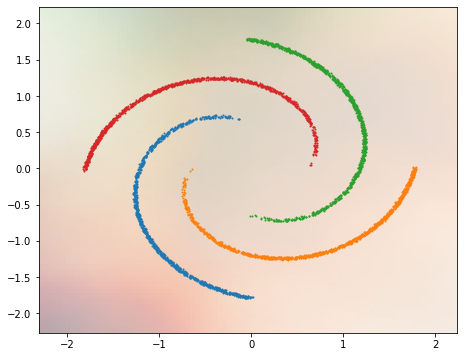

epoch:   2 - train loss: 0.88231, val_loss: 1.04761, β: 1.00194, lr: 0.00010
epoch:   3 - train loss: 0.64482, val_loss: 0.73280, β: 1.00294, lr: 0.00010
epoch:   4 - train loss: 0.51616, val_loss: 0.50099, β: 1.00393, lr: 0.00010
epoch:   5 - train loss: 0.43784, val_loss: 0.39366, β: 1.00493, lr: 0.00010
epoch:   6 - train loss: 0.38547, val_loss: 0.33091, β: 1.00593, lr: 0.00010
epoch:   7 - train loss: 0.34653, val_loss: 0.29972, β: 1.00693, lr: 0.00010
epoch:   8 - train loss: 0.31572, val_loss: 0.27230, β: 1.00793, lr: 0.00010
epoch:   9 - train loss: 0.29082, val_loss: 0.24797, β: 1.00892, lr: 0.00010
epoch:  10 - train loss: 0.27024, val_loss: 0.22580, β: 1.00992, lr: 0.00010
epoch:  11 - train loss: 0.25336, val_loss: 0.21448, β: 1.01092, lr: 0.00010
epoch:  12 - train loss: 0.23723, val_loss: 0.19988, β: 1.01192, lr: 0.00010
epoch:  13 - train loss: 0.22271, val_loss: 0.18813, β: 1.01292, lr: 0.00010
epoch:  14 - train loss: 0.21067, val_loss: 0.17673, β: 1.01391, lr: 0.00010

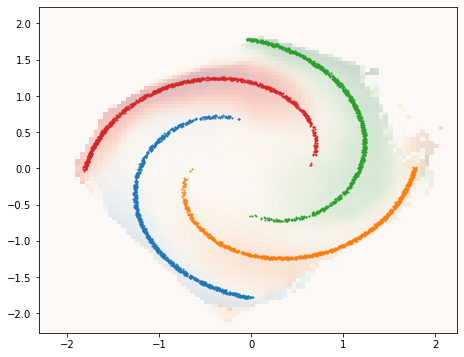

epoch:  22 - train loss: 0.14703, val_loss: 0.12060, β: 1.02190, lr: 0.00010
epoch:  23 - train loss: 0.14173, val_loss: 0.11587, β: 1.02290, lr: 0.00010
epoch:  24 - train loss: 0.13674, val_loss: 0.11169, β: 1.02389, lr: 0.00010
epoch:  25 - train loss: 0.13210, val_loss: 0.10768, β: 1.02489, lr: 0.00010
epoch:  26 - train loss: 0.12796, val_loss: 0.10463, β: 1.02589, lr: 0.00010
epoch:  27 - train loss: 0.12394, val_loss: 0.10046, β: 1.02689, lr: 0.00010
epoch:  28 - train loss: 0.11985, val_loss: 0.09681, β: 1.02789, lr: 0.00010
epoch:  29 - train loss: 0.11606, val_loss: 0.09372, β: 1.02888, lr: 0.00010
epoch:  30 - train loss: 0.11253, val_loss: 0.09045, β: 1.02988, lr: 0.00010
epoch:  31 - train loss: 0.10915, val_loss: 0.08768, β: 1.03088, lr: 0.00010
epoch:  32 - train loss: 0.10603, val_loss: 0.08500, β: 1.03188, lr: 0.00010
epoch:  33 - train loss: 0.10297, val_loss: 0.08245, β: 1.03288, lr: 0.00010
epoch:  34 - train loss: 0.10006, val_loss: 0.08001, β: 1.03387, lr: 0.00010

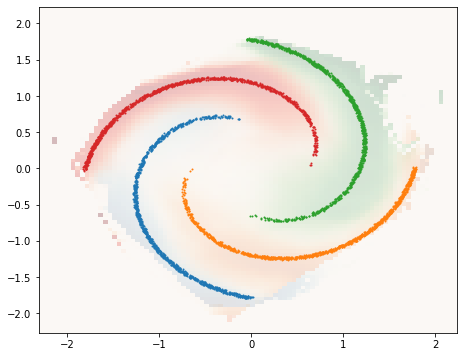

epoch:  42 - train loss: 0.08124, val_loss: 0.06418, β: 1.04186, lr: 0.00010
epoch:  43 - train loss: 0.07932, val_loss: 0.06231, β: 1.04286, lr: 0.00010
epoch:  44 - train loss: 0.07739, val_loss: 0.06048, β: 1.04385, lr: 0.00010
epoch:  45 - train loss: 0.07559, val_loss: 0.05919, β: 1.04485, lr: 0.00010
epoch:  46 - train loss: 0.07385, val_loss: 0.05788, β: 1.04585, lr: 0.00010
epoch:  47 - train loss: 0.07219, val_loss: 0.05635, β: 1.04685, lr: 0.00010
epoch:  48 - train loss: 0.07059, val_loss: 0.05528, β: 1.04785, lr: 0.00010
epoch:  49 - train loss: 0.06905, val_loss: 0.05396, β: 1.04884, lr: 0.00010
epoch:  50 - train loss: 0.06757, val_loss: 0.05284, β: 1.04984, lr: 0.00010
epoch:  51 - train loss: 0.06615, val_loss: 0.05163, β: 1.05084, lr: 0.00010
epoch:  52 - train loss: 0.06479, val_loss: 0.05054, β: 1.05184, lr: 0.00010
epoch:  53 - train loss: 0.06346, val_loss: 0.04939, β: 1.05284, lr: 0.00010
epoch:  54 - train loss: 0.06217, val_loss: 0.04832, β: 1.05383, lr: 0.00010

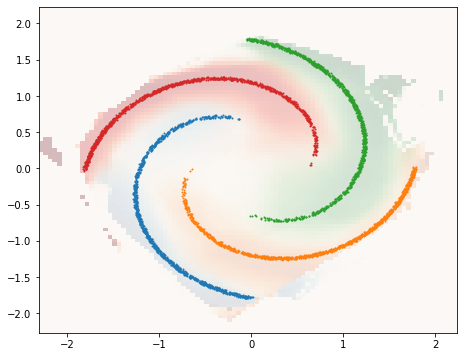

epoch:  62 - train loss: 0.05328, val_loss: 0.04116, β: 1.06182, lr: 0.00010
epoch:  63 - train loss: 0.05232, val_loss: 0.04036, β: 1.06282, lr: 0.00010
epoch:  64 - train loss: 0.05138, val_loss: 0.03964, β: 1.06381, lr: 0.00010
epoch:  65 - train loss: 0.05048, val_loss: 0.03892, β: 1.06481, lr: 0.00010
epoch:  66 - train loss: 0.04961, val_loss: 0.03827, β: 1.06581, lr: 0.00010
epoch:  67 - train loss: 0.04876, val_loss: 0.03753, β: 1.06681, lr: 0.00010
epoch:  68 - train loss: 0.04789, val_loss: 0.03689, β: 1.06781, lr: 0.00010
epoch:  69 - train loss: 0.04704, val_loss: 0.03625, β: 1.06880, lr: 0.00010
epoch:  70 - train loss: 0.04622, val_loss: 0.03561, β: 1.06980, lr: 0.00010
epoch:  71 - train loss: 0.04543, val_loss: 0.03490, β: 1.07080, lr: 0.00010
epoch:  72 - train loss: 0.04467, val_loss: 0.03428, β: 1.07180, lr: 0.00010
epoch:  73 - train loss: 0.04393, val_loss: 0.03370, β: 1.07280, lr: 0.00010
epoch:  74 - train loss: 0.04323, val_loss: 0.03312, β: 1.07379, lr: 0.00010

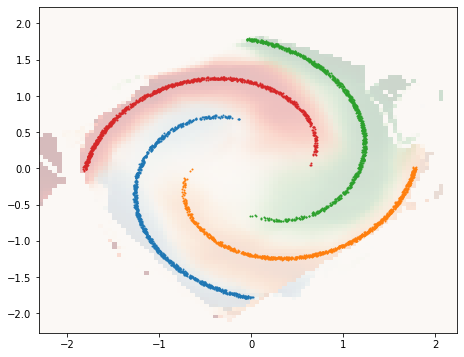

epoch:  82 - train loss: 0.03815, val_loss: 0.02918, β: 1.08178, lr: 0.00010
epoch:  83 - train loss: 0.03759, val_loss: 0.02866, β: 1.08278, lr: 0.00010
epoch:  84 - train loss: 0.03703, val_loss: 0.02822, β: 1.08377, lr: 0.00010
epoch:  85 - train loss: 0.03650, val_loss: 0.02777, β: 1.08477, lr: 0.00010
epoch:  86 - train loss: 0.03597, val_loss: 0.02737, β: 1.08577, lr: 0.00010
epoch:  87 - train loss: 0.03545, val_loss: 0.02696, β: 1.08677, lr: 0.00010
epoch:  88 - train loss: 0.03494, val_loss: 0.02655, β: 1.08777, lr: 0.00010
epoch:  89 - train loss: 0.03445, val_loss: 0.02615, β: 1.08876, lr: 0.00010
epoch:  90 - train loss: 0.03396, val_loss: 0.02576, β: 1.08976, lr: 0.00010
epoch:  91 - train loss: 0.03348, val_loss: 0.02543, β: 1.09076, lr: 0.00010
epoch:  92 - train loss: 0.03302, val_loss: 0.02509, β: 1.09176, lr: 0.00010
epoch:  93 - train loss: 0.03257, val_loss: 0.02465, β: 1.09276, lr: 0.00010
epoch:  94 - train loss: 0.03213, val_loss: 0.02435, β: 1.09375, lr: 0.00010

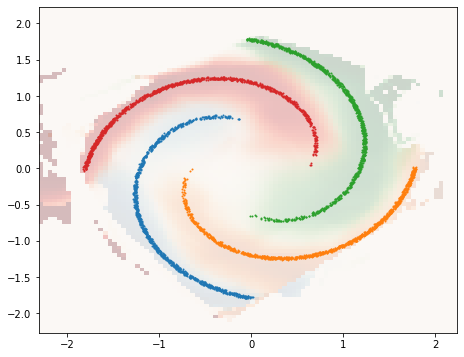

epoch: 102 - train loss: 0.02890, val_loss: 0.02175, β: 1.10174, lr: 0.00010
epoch: 103 - train loss: 0.02853, val_loss: 0.02150, β: 1.10274, lr: 0.00010
epoch: 104 - train loss: 0.02816, val_loss: 0.02125, β: 1.10373, lr: 0.00010
epoch: 105 - train loss: 0.02781, val_loss: 0.02096, β: 1.10473, lr: 0.00010
epoch: 106 - train loss: 0.02746, val_loss: 0.02068, β: 1.10573, lr: 0.00010
epoch: 107 - train loss: 0.02712, val_loss: 0.02042, β: 1.10673, lr: 0.00010
epoch: 108 - train loss: 0.02678, val_loss: 0.02014, β: 1.10773, lr: 0.00010
epoch: 109 - train loss: 0.02646, val_loss: 0.01988, β: 1.10872, lr: 0.00010
epoch: 110 - train loss: 0.02613, val_loss: 0.01963, β: 1.10972, lr: 0.00010
epoch: 111 - train loss: 0.02582, val_loss: 0.01939, β: 1.11072, lr: 0.00010
epoch: 112 - train loss: 0.02550, val_loss: 0.01914, β: 1.11172, lr: 0.00010
epoch: 113 - train loss: 0.02520, val_loss: 0.01891, β: 1.11272, lr: 0.00010
epoch: 114 - train loss: 0.02490, val_loss: 0.01867, β: 1.11371, lr: 0.00010

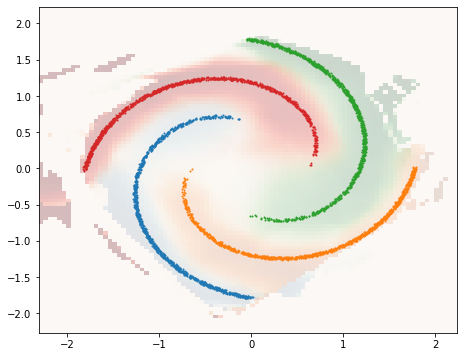

epoch: 122 - train loss: 0.02265, val_loss: 0.01688, β: 1.12170, lr: 0.00010
epoch: 123 - train loss: 0.02239, val_loss: 0.01668, β: 1.12270, lr: 0.00010
epoch: 124 - train loss: 0.02213, val_loss: 0.01648, β: 1.12369, lr: 0.00010
epoch: 125 - train loss: 0.02188, val_loss: 0.01628, β: 1.12469, lr: 0.00010
epoch: 126 - train loss: 0.02164, val_loss: 0.01609, β: 1.12569, lr: 0.00010
epoch: 127 - train loss: 0.02139, val_loss: 0.01590, β: 1.12669, lr: 0.00010
epoch: 128 - train loss: 0.02116, val_loss: 0.01571, β: 1.12769, lr: 0.00010
epoch: 129 - train loss: 0.02092, val_loss: 0.01553, β: 1.12868, lr: 0.00010
epoch: 130 - train loss: 0.02069, val_loss: 0.01535, β: 1.12968, lr: 0.00010
epoch: 131 - train loss: 0.02046, val_loss: 0.01516, β: 1.13068, lr: 0.00010
epoch: 132 - train loss: 0.02024, val_loss: 0.01499, β: 1.13168, lr: 0.00010
epoch: 133 - train loss: 0.02002, val_loss: 0.01481, β: 1.13268, lr: 0.00010
epoch: 134 - train loss: 0.01980, val_loss: 0.01463, β: 1.13367, lr: 0.00010

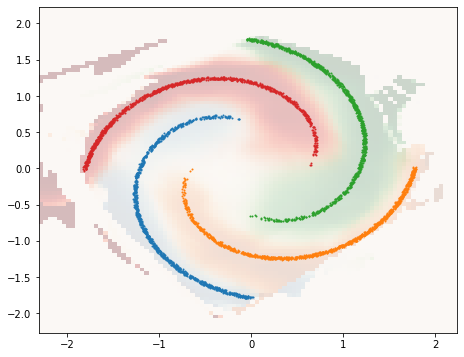

epoch: 142 - train loss: 0.01817, val_loss: 0.01335, β: 1.14166, lr: 0.00010
epoch: 143 - train loss: 0.01798, val_loss: 0.01320, β: 1.14266, lr: 0.00010
epoch: 144 - train loss: 0.01779, val_loss: 0.01305, β: 1.14365, lr: 0.00010
epoch: 145 - train loss: 0.01761, val_loss: 0.01291, β: 1.14465, lr: 0.00010
epoch: 146 - train loss: 0.01743, val_loss: 0.01277, β: 1.14565, lr: 0.00010
epoch: 147 - train loss: 0.01725, val_loss: 0.01263, β: 1.14665, lr: 0.00010
epoch: 148 - train loss: 0.01708, val_loss: 0.01249, β: 1.14765, lr: 0.00010
epoch: 149 - train loss: 0.01690, val_loss: 0.01236, β: 1.14864, lr: 0.00010
epoch: 150 - train loss: 0.01674, val_loss: 0.01222, β: 1.14964, lr: 0.00010
epoch: 151 - train loss: 0.01657, val_loss: 0.01209, β: 1.15064, lr: 0.00010
epoch: 152 - train loss: 0.01640, val_loss: 0.01196, β: 1.15164, lr: 0.00010
epoch: 153 - train loss: 0.01624, val_loss: 0.01183, β: 1.15264, lr: 0.00010
epoch: 154 - train loss: 0.01608, val_loss: 0.01171, β: 1.15363, lr: 0.00010

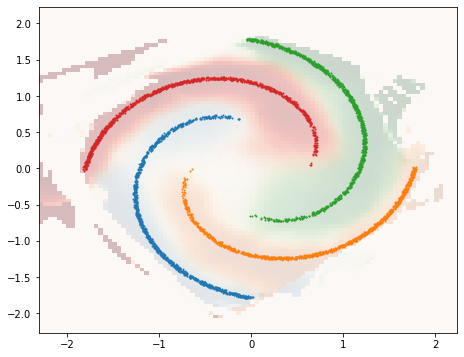

epoch: 162 - train loss: 0.01487, val_loss: 0.01077, β: 1.16162, lr: 0.00010
epoch: 163 - train loss: 0.01472, val_loss: 0.01066, β: 1.16262, lr: 0.00010
epoch: 164 - train loss: 0.01458, val_loss: 0.01055, β: 1.16361, lr: 0.00010
epoch: 165 - train loss: 0.01445, val_loss: 0.01044, β: 1.16461, lr: 0.00010
epoch: 166 - train loss: 0.01431, val_loss: 0.01034, β: 1.16561, lr: 0.00010
epoch: 167 - train loss: 0.01418, val_loss: 0.01023, β: 1.16661, lr: 0.00010
epoch: 168 - train loss: 0.01404, val_loss: 0.01013, β: 1.16761, lr: 0.00010
epoch: 169 - train loss: 0.01391, val_loss: 0.01003, β: 1.16860, lr: 0.00010
epoch: 170 - train loss: 0.01378, val_loss: 0.00993, β: 1.16960, lr: 0.00010
epoch: 171 - train loss: 0.01366, val_loss: 0.00983, β: 1.17060, lr: 0.00010
epoch: 172 - train loss: 0.01353, val_loss: 0.00974, β: 1.17160, lr: 0.00010
epoch: 173 - train loss: 0.01340, val_loss: 0.00964, β: 1.17260, lr: 0.00010
epoch: 174 - train loss: 0.01328, val_loss: 0.00955, β: 1.17359, lr: 0.00010

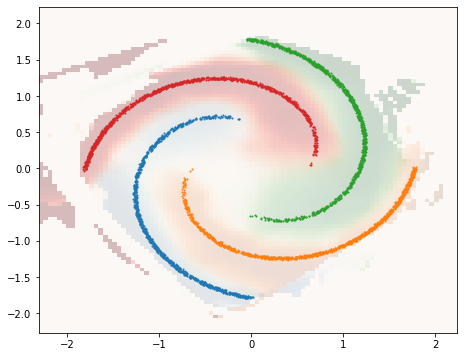

epoch: 182 - train loss: 0.01235, val_loss: 0.00884, β: 1.18158, lr: 0.00010
epoch: 183 - train loss: 0.01224, val_loss: 0.00875, β: 1.18258, lr: 0.00010
epoch: 184 - train loss: 0.01213, val_loss: 0.00867, β: 1.18357, lr: 0.00010
epoch: 185 - train loss: 0.01202, val_loss: 0.00859, β: 1.18457, lr: 0.00010
epoch: 186 - train loss: 0.01192, val_loss: 0.00851, β: 1.18557, lr: 0.00010
epoch: 187 - train loss: 0.01181, val_loss: 0.00843, β: 1.18657, lr: 0.00010
epoch: 188 - train loss: 0.01171, val_loss: 0.00835, β: 1.18757, lr: 0.00010
epoch: 189 - train loss: 0.01161, val_loss: 0.00827, β: 1.18856, lr: 0.00010
epoch: 190 - train loss: 0.01151, val_loss: 0.00820, β: 1.18956, lr: 0.00010
epoch: 191 - train loss: 0.01140, val_loss: 0.00812, β: 1.19056, lr: 0.00010
epoch: 192 - train loss: 0.01131, val_loss: 0.00805, β: 1.19156, lr: 0.00010
epoch: 193 - train loss: 0.01121, val_loss: 0.00798, β: 1.19256, lr: 0.00010
epoch: 194 - train loss: 0.01111, val_loss: 0.00790, β: 1.19355, lr: 0.00010

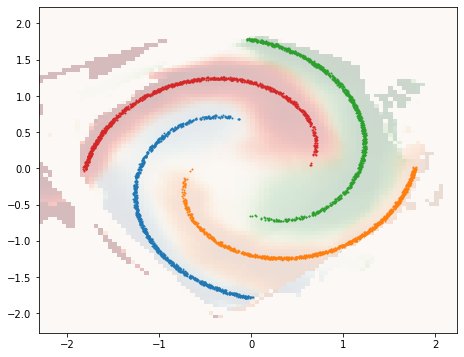

epoch: 202 - train loss: 0.01038, val_loss: 0.00735, β: 1.20154, lr: 0.00010
epoch: 203 - train loss: 0.01029, val_loss: 0.00728, β: 1.20254, lr: 0.00010
epoch: 204 - train loss: 0.01020, val_loss: 0.00722, β: 1.20353, lr: 0.00010
epoch: 205 - train loss: 0.01011, val_loss: 0.00715, β: 1.20453, lr: 0.00010
epoch: 206 - train loss: 0.01003, val_loss: 0.00709, β: 1.20553, lr: 0.00010
epoch: 207 - train loss: 0.00995, val_loss: 0.00703, β: 1.20653, lr: 0.00010
epoch: 208 - train loss: 0.00986, val_loss: 0.00697, β: 1.20753, lr: 0.00010
epoch: 209 - train loss: 0.00978, val_loss: 0.00691, β: 1.20852, lr: 0.00010
epoch: 210 - train loss: 0.00970, val_loss: 0.00685, β: 1.20952, lr: 0.00010
epoch: 211 - train loss: 0.00962, val_loss: 0.00679, β: 1.21052, lr: 0.00010
epoch: 212 - train loss: 0.00954, val_loss: 0.00673, β: 1.21152, lr: 0.00010
epoch: 213 - train loss: 0.00947, val_loss: 0.00667, β: 1.21252, lr: 0.00010
epoch: 214 - train loss: 0.00939, val_loss: 0.00661, β: 1.21351, lr: 0.00010

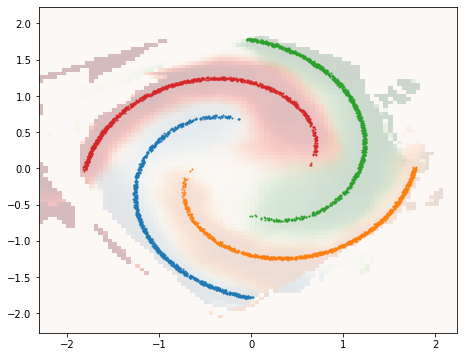

epoch: 222 - train loss: 0.00880, val_loss: 0.00618, β: 1.22150, lr: 0.00010
epoch: 223 - train loss: 0.00873, val_loss: 0.00613, β: 1.22250, lr: 0.00010
epoch: 224 - train loss: 0.00866, val_loss: 0.00608, β: 1.22349, lr: 0.00010
epoch: 225 - train loss: 0.00859, val_loss: 0.00602, β: 1.22449, lr: 0.00010
epoch: 226 - train loss: 0.00853, val_loss: 0.00597, β: 1.22549, lr: 0.00010
epoch: 227 - train loss: 0.00846, val_loss: 0.00593, β: 1.22649, lr: 0.00010
epoch: 228 - train loss: 0.00839, val_loss: 0.00588, β: 1.22749, lr: 0.00010
epoch: 229 - train loss: 0.00833, val_loss: 0.00583, β: 1.22848, lr: 0.00010
epoch: 230 - train loss: 0.00826, val_loss: 0.00578, β: 1.22948, lr: 0.00010
epoch: 231 - train loss: 0.00820, val_loss: 0.00573, β: 1.23048, lr: 0.00010
epoch: 232 - train loss: 0.00813, val_loss: 0.00569, β: 1.23148, lr: 0.00010
epoch: 233 - train loss: 0.00807, val_loss: 0.00564, β: 1.23248, lr: 0.00010
epoch: 234 - train loss: 0.00801, val_loss: 0.00559, β: 1.23347, lr: 0.00010

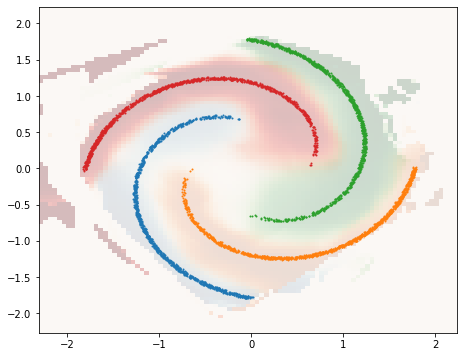

epoch: 242 - train loss: 0.00753, val_loss: 0.00525, β: 1.24146, lr: 0.00010
epoch: 243 - train loss: 0.00747, val_loss: 0.00520, β: 1.24246, lr: 0.00010
epoch: 244 - train loss: 0.00742, val_loss: 0.00516, β: 1.24345, lr: 0.00010
epoch: 245 - train loss: 0.00736, val_loss: 0.00512, β: 1.24445, lr: 0.00010
epoch: 246 - train loss: 0.00730, val_loss: 0.00508, β: 1.24545, lr: 0.00010
epoch: 247 - train loss: 0.00725, val_loss: 0.00504, β: 1.24645, lr: 0.00010
epoch: 248 - train loss: 0.00719, val_loss: 0.00500, β: 1.24745, lr: 0.00010
epoch: 249 - train loss: 0.00714, val_loss: 0.00496, β: 1.24844, lr: 0.00010
epoch: 250 - train loss: 0.00709, val_loss: 0.00492, β: 1.24944, lr: 0.00010
epoch: 251 - train loss: 0.00703, val_loss: 0.00489, β: 1.25044, lr: 0.00010
epoch: 252 - train loss: 0.00698, val_loss: 0.00484, β: 1.25144, lr: 0.00010
epoch: 253 - train loss: 0.00693, val_loss: 0.00481, β: 1.25244, lr: 0.00010
epoch: 254 - train loss: 0.00688, val_loss: 0.00477, β: 1.25343, lr: 0.00010

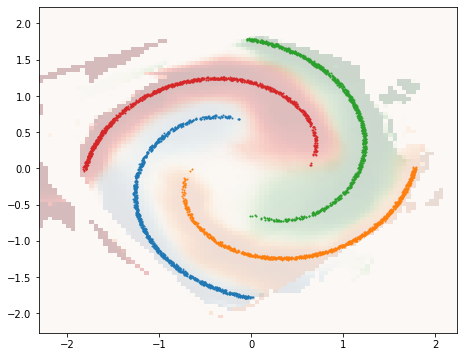

epoch: 262 - train loss: 0.00649, val_loss: 0.00448, β: 1.26142, lr: 0.00010
epoch: 263 - train loss: 0.00644, val_loss: 0.00445, β: 1.26242, lr: 0.00010
epoch: 264 - train loss: 0.00639, val_loss: 0.00442, β: 1.26341, lr: 0.00010
epoch: 265 - train loss: 0.00635, val_loss: 0.00438, β: 1.26441, lr: 0.00010
epoch: 266 - train loss: 0.00630, val_loss: 0.00435, β: 1.26541, lr: 0.00010
epoch: 267 - train loss: 0.00625, val_loss: 0.00431, β: 1.26641, lr: 0.00010
epoch: 268 - train loss: 0.00621, val_loss: 0.00428, β: 1.26741, lr: 0.00010
epoch: 269 - train loss: 0.00617, val_loss: 0.00425, β: 1.26840, lr: 0.00010
epoch: 270 - train loss: 0.00612, val_loss: 0.00422, β: 1.26940, lr: 0.00010
epoch: 271 - train loss: 0.00608, val_loss: 0.00419, β: 1.27040, lr: 0.00010
epoch: 272 - train loss: 0.00603, val_loss: 0.00415, β: 1.27140, lr: 0.00010
epoch: 273 - train loss: 0.00599, val_loss: 0.00412, β: 1.27240, lr: 0.00010
epoch: 274 - train loss: 0.00595, val_loss: 0.00409, β: 1.27339, lr: 0.00010

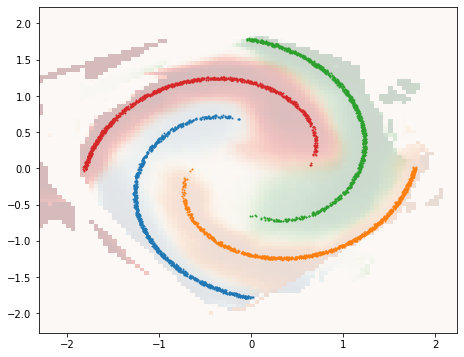

epoch: 282 - train loss: 0.00562, val_loss: 0.00385, β: 1.28138, lr: 0.00010
epoch: 283 - train loss: 0.00558, val_loss: 0.00383, β: 1.28238, lr: 0.00010
epoch: 284 - train loss: 0.00554, val_loss: 0.00380, β: 1.28337, lr: 0.00010
epoch: 285 - train loss: 0.00551, val_loss: 0.00377, β: 1.28437, lr: 0.00010
epoch: 286 - train loss: 0.00547, val_loss: 0.00374, β: 1.28537, lr: 0.00010
epoch: 287 - train loss: 0.00543, val_loss: 0.00371, β: 1.28637, lr: 0.00010
epoch: 288 - train loss: 0.00539, val_loss: 0.00369, β: 1.28737, lr: 0.00010
epoch: 289 - train loss: 0.00535, val_loss: 0.00366, β: 1.28836, lr: 0.00010
epoch: 290 - train loss: 0.00532, val_loss: 0.00363, β: 1.28936, lr: 0.00010
epoch: 291 - train loss: 0.00528, val_loss: 0.00361, β: 1.29036, lr: 0.00010
epoch: 292 - train loss: 0.00524, val_loss: 0.00358, β: 1.29136, lr: 0.00010
epoch: 293 - train loss: 0.00521, val_loss: 0.00355, β: 1.29236, lr: 0.00010
epoch: 294 - train loss: 0.00517, val_loss: 0.00353, β: 1.29335, lr: 0.00010

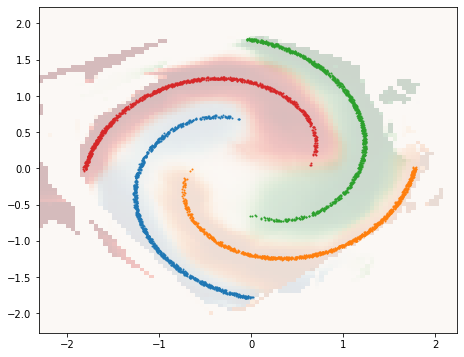

epoch: 302 - train loss: 0.00490, val_loss: 0.00333, β: 1.30134, lr: 0.00010
epoch: 303 - train loss: 0.00486, val_loss: 0.00331, β: 1.30234, lr: 0.00010
epoch: 304 - train loss: 0.00483, val_loss: 0.00328, β: 1.30333, lr: 0.00010
epoch: 305 - train loss: 0.00480, val_loss: 0.00326, β: 1.30433, lr: 0.00010
epoch: 306 - train loss: 0.00477, val_loss: 0.00324, β: 1.30533, lr: 0.00010
epoch: 307 - train loss: 0.00473, val_loss: 0.00321, β: 1.30633, lr: 0.00010
epoch: 308 - train loss: 0.00470, val_loss: 0.00319, β: 1.30733, lr: 0.00010
epoch: 309 - train loss: 0.00467, val_loss: 0.00317, β: 1.30832, lr: 0.00010
epoch: 310 - train loss: 0.00464, val_loss: 0.00314, β: 1.30932, lr: 0.00010
epoch: 311 - train loss: 0.00461, val_loss: 0.00312, β: 1.31032, lr: 0.00010
epoch: 312 - train loss: 0.00458, val_loss: 0.00310, β: 1.31132, lr: 0.00010
epoch: 313 - train loss: 0.00455, val_loss: 0.00308, β: 1.31232, lr: 0.00010
epoch: 314 - train loss: 0.00452, val_loss: 0.00306, β: 1.31331, lr: 0.00010

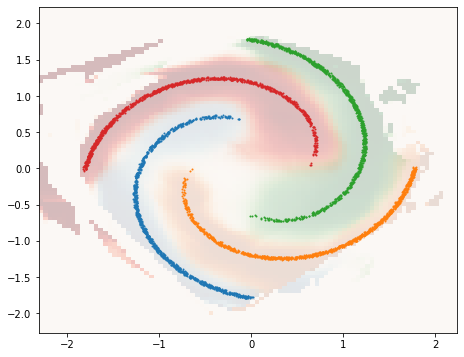

epoch: 322 - train loss: 0.00428, val_loss: 0.00289, β: 1.32130, lr: 0.00010
epoch: 323 - train loss: 0.00426, val_loss: 0.00287, β: 1.32230, lr: 0.00010
epoch: 324 - train loss: 0.00423, val_loss: 0.00285, β: 1.32329, lr: 0.00010
epoch: 325 - train loss: 0.00420, val_loss: 0.00283, β: 1.32429, lr: 0.00010
epoch: 326 - train loss: 0.00417, val_loss: 0.00281, β: 1.32529, lr: 0.00010
epoch: 327 - train loss: 0.00414, val_loss: 0.00279, β: 1.32629, lr: 0.00010
epoch: 328 - train loss: 0.00412, val_loss: 0.00277, β: 1.32729, lr: 0.00010
epoch: 329 - train loss: 0.00409, val_loss: 0.00275, β: 1.32828, lr: 0.00010
epoch: 330 - train loss: 0.00406, val_loss: 0.00273, β: 1.32928, lr: 0.00010
epoch: 331 - train loss: 0.00404, val_loss: 0.00272, β: 1.33028, lr: 0.00010
epoch: 332 - train loss: 0.00401, val_loss: 0.00270, β: 1.33128, lr: 0.00010
epoch: 333 - train loss: 0.00399, val_loss: 0.00268, β: 1.33228, lr: 0.00010
epoch: 334 - train loss: 0.00396, val_loss: 0.00266, β: 1.33327, lr: 0.00010

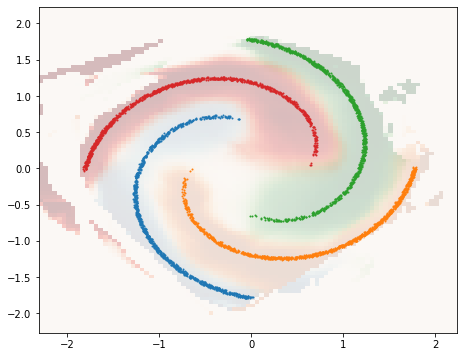

epoch: 342 - train loss: 0.00376, val_loss: 0.00252, β: 1.34126, lr: 0.00010
epoch: 343 - train loss: 0.00374, val_loss: 0.00250, β: 1.34226, lr: 0.00010
epoch: 344 - train loss: 0.00372, val_loss: 0.00248, β: 1.34325, lr: 0.00010
epoch: 345 - train loss: 0.00369, val_loss: 0.00247, β: 1.34425, lr: 0.00010
epoch: 346 - train loss: 0.00367, val_loss: 0.00245, β: 1.34525, lr: 0.00010
epoch: 347 - train loss: 0.00365, val_loss: 0.00243, β: 1.34625, lr: 0.00010
epoch: 348 - train loss: 0.00362, val_loss: 0.00242, β: 1.34725, lr: 0.00010
epoch: 349 - train loss: 0.00360, val_loss: 0.00240, β: 1.34824, lr: 0.00010
epoch: 350 - train loss: 0.00358, val_loss: 0.00238, β: 1.34924, lr: 0.00010
epoch: 351 - train loss: 0.00356, val_loss: 0.00237, β: 1.35024, lr: 0.00010
epoch: 352 - train loss: 0.00353, val_loss: 0.00235, β: 1.35124, lr: 0.00010
epoch: 353 - train loss: 0.00351, val_loss: 0.00234, β: 1.35224, lr: 0.00010
epoch: 354 - train loss: 0.00349, val_loss: 0.00232, β: 1.35323, lr: 0.00010

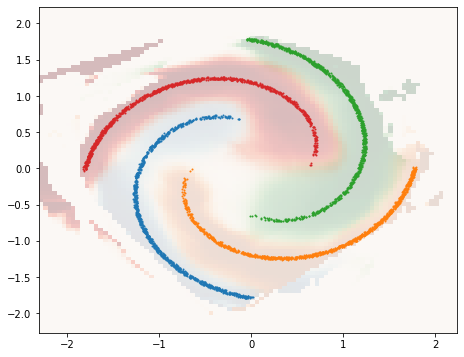

epoch: 362 - train loss: 0.00332, val_loss: 0.00220, β: 1.36122, lr: 0.00010
epoch: 363 - train loss: 0.00330, val_loss: 0.00219, β: 1.36222, lr: 0.00010
epoch: 364 - train loss: 0.00328, val_loss: 0.00217, β: 1.36321, lr: 0.00010
epoch: 365 - train loss: 0.00326, val_loss: 0.00216, β: 1.36421, lr: 0.00010
epoch: 366 - train loss: 0.00324, val_loss: 0.00214, β: 1.36521, lr: 0.00010
epoch: 367 - train loss: 0.00322, val_loss: 0.00213, β: 1.36621, lr: 0.00010
epoch: 368 - train loss: 0.00320, val_loss: 0.00211, β: 1.36721, lr: 0.00010
epoch: 369 - train loss: 0.00318, val_loss: 0.00210, β: 1.36820, lr: 0.00010
epoch: 370 - train loss: 0.00316, val_loss: 0.00209, β: 1.36920, lr: 0.00010
epoch: 371 - train loss: 0.00314, val_loss: 0.00207, β: 1.37020, lr: 0.00010
epoch: 372 - train loss: 0.00312, val_loss: 0.00206, β: 1.37120, lr: 0.00010
epoch: 373 - train loss: 0.00310, val_loss: 0.00205, β: 1.37220, lr: 0.00010
epoch: 374 - train loss: 0.00308, val_loss: 0.00203, β: 1.37319, lr: 0.00010

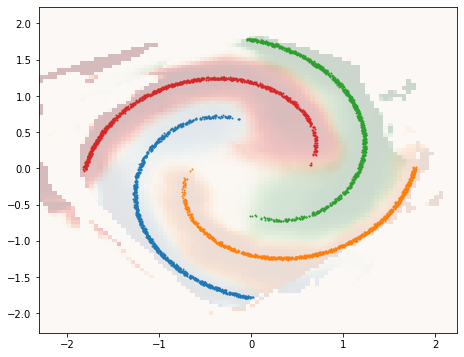

epoch: 382 - train loss: 0.00294, val_loss: 0.00193, β: 1.38118, lr: 0.00010
epoch: 383 - train loss: 0.00292, val_loss: 0.00192, β: 1.38218, lr: 0.00010
epoch: 384 - train loss: 0.00290, val_loss: 0.00190, β: 1.38317, lr: 0.00010
epoch: 385 - train loss: 0.00289, val_loss: 0.00189, β: 1.38417, lr: 0.00010
epoch: 386 - train loss: 0.00287, val_loss: 0.00188, β: 1.38517, lr: 0.00010
epoch: 387 - train loss: 0.00285, val_loss: 0.00187, β: 1.38617, lr: 0.00010
epoch: 388 - train loss: 0.00283, val_loss: 0.00185, β: 1.38717, lr: 0.00010
epoch: 389 - train loss: 0.00282, val_loss: 0.00184, β: 1.38816, lr: 0.00010
epoch: 390 - train loss: 0.00280, val_loss: 0.00183, β: 1.38916, lr: 0.00010
epoch: 391 - train loss: 0.00278, val_loss: 0.00182, β: 1.39016, lr: 0.00010
epoch: 392 - train loss: 0.00277, val_loss: 0.00181, β: 1.39116, lr: 0.00010
epoch: 393 - train loss: 0.00275, val_loss: 0.00180, β: 1.39216, lr: 0.00010
epoch: 394 - train loss: 0.00274, val_loss: 0.00178, β: 1.39315, lr: 0.00010

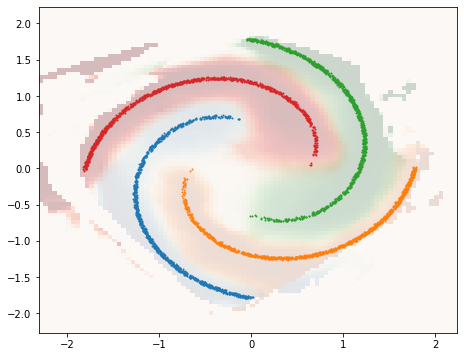

epoch: 402 - train loss: 0.00261, val_loss: 0.00170, β: 1.40114, lr: 0.00010
epoch: 403 - train loss: 0.00259, val_loss: 0.00168, β: 1.40214, lr: 0.00010
epoch: 404 - train loss: 0.00258, val_loss: 0.00167, β: 1.40313, lr: 0.00010
epoch: 405 - train loss: 0.00256, val_loss: 0.00166, β: 1.40413, lr: 0.00010
epoch: 406 - train loss: 0.00255, val_loss: 0.00165, β: 1.40513, lr: 0.00010
epoch: 407 - train loss: 0.00253, val_loss: 0.00164, β: 1.40613, lr: 0.00010
epoch: 408 - train loss: 0.00252, val_loss: 0.00163, β: 1.40713, lr: 0.00010
epoch: 409 - train loss: 0.00250, val_loss: 0.00162, β: 1.40812, lr: 0.00010
epoch: 410 - train loss: 0.00249, val_loss: 0.00161, β: 1.40912, lr: 0.00010
epoch: 411 - train loss: 0.00247, val_loss: 0.00160, β: 1.41012, lr: 0.00010
epoch: 412 - train loss: 0.00246, val_loss: 0.00159, β: 1.41112, lr: 0.00010
epoch: 413 - train loss: 0.00245, val_loss: 0.00158, β: 1.41212, lr: 0.00010
epoch: 414 - train loss: 0.00243, val_loss: 0.00157, β: 1.41312, lr: 0.00010

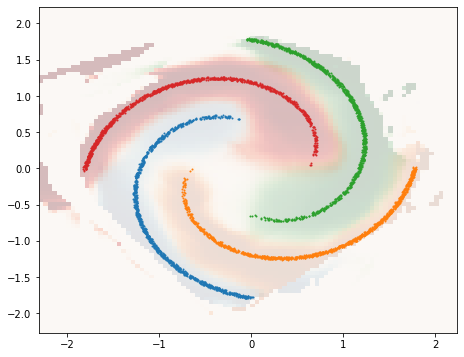

epoch: 422 - train loss: 0.00232, val_loss: 0.00149, β: 1.42110, lr: 0.00010
epoch: 423 - train loss: 0.00231, val_loss: 0.00149, β: 1.42210, lr: 0.00010
epoch: 424 - train loss: 0.00229, val_loss: 0.00148, β: 1.42309, lr: 0.00010
epoch: 425 - train loss: 0.00228, val_loss: 0.00147, β: 1.42409, lr: 0.00010
epoch: 426 - train loss: 0.00227, val_loss: 0.00146, β: 1.42509, lr: 0.00010
Best val_loss
epoch: 427 - train loss: 0.00226, val_loss: 0.00145, β: 1.42609, lr: 0.00010
Best val_loss
epoch: 428 - train loss: 0.00224, val_loss: 0.00144, β: 1.42709, lr: 0.00010
Best val_loss
epoch: 429 - train loss: 0.00223, val_loss: 0.00143, β: 1.42809, lr: 0.00010
Best val_loss
epoch: 430 - train loss: 0.00222, val_loss: 0.00142, β: 1.42908, lr: 0.00010
Best val_loss
epoch: 431 - train loss: 0.00220, val_loss: 0.00141, β: 1.43008, lr: 0.00010
Best val_loss
epoch: 432 - train loss: 0.00219, val_loss: 0.00140, β: 1.43108, lr: 0.00010
Best val_loss
epoch: 433 - train loss: 0.00218, val_loss: 0.00140, β:

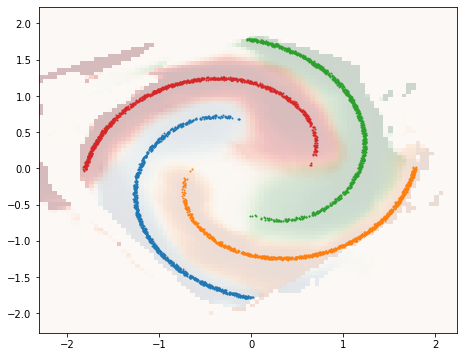

Best val_loss
epoch: 442 - train loss: 0.00207, val_loss: 0.00132, β: 1.44106, lr: 0.00010
Best val_loss
epoch: 443 - train loss: 0.00206, val_loss: 0.00131, β: 1.44206, lr: 0.00010
Best val_loss
epoch: 444 - train loss: 0.00205, val_loss: 0.00130, β: 1.44306, lr: 0.00010
Best val_loss
epoch: 445 - train loss: 0.00204, val_loss: 0.00130, β: 1.44405, lr: 0.00010
Best val_loss
epoch: 446 - train loss: 0.00202, val_loss: 0.00129, β: 1.44505, lr: 0.00010
Best val_loss
epoch: 447 - train loss: 0.00201, val_loss: 0.00128, β: 1.44605, lr: 0.00010
Best val_loss
epoch: 448 - train loss: 0.00200, val_loss: 0.00127, β: 1.44705, lr: 0.00010
Best val_loss
epoch: 449 - train loss: 0.00199, val_loss: 0.00127, β: 1.44805, lr: 0.00010
Best val_loss
epoch: 450 - train loss: 0.00198, val_loss: 0.00126, β: 1.44904, lr: 0.00010
Best val_loss
epoch: 451 - train loss: 0.00197, val_loss: 0.00125, β: 1.45004, lr: 0.00010
Best val_loss
epoch: 452 - train loss: 0.00196, val_loss: 0.00124, β: 1.45104, lr: 0.00010

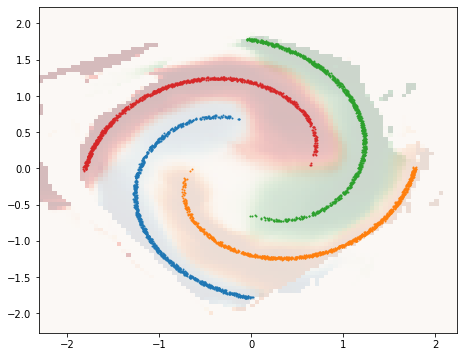

Best val_loss
epoch: 462 - train loss: 0.00185, val_loss: 0.00117, β: 1.46102, lr: 0.00010
Best val_loss
epoch: 463 - train loss: 0.00184, val_loss: 0.00116, β: 1.46202, lr: 0.00010
Best val_loss
epoch: 464 - train loss: 0.00183, val_loss: 0.00116, β: 1.46302, lr: 0.00010
Best val_loss
epoch: 465 - train loss: 0.00182, val_loss: 0.00115, β: 1.46401, lr: 0.00010
Best val_loss
epoch: 466 - train loss: 0.00181, val_loss: 0.00114, β: 1.46501, lr: 0.00010
Best val_loss
epoch: 467 - train loss: 0.00180, val_loss: 0.00114, β: 1.46601, lr: 0.00010
Best val_loss
epoch: 468 - train loss: 0.00179, val_loss: 0.00113, β: 1.46701, lr: 0.00010
Best val_loss
epoch: 469 - train loss: 0.00178, val_loss: 0.00112, β: 1.46801, lr: 0.00010
Best val_loss
epoch: 470 - train loss: 0.00177, val_loss: 0.00112, β: 1.46900, lr: 0.00010
Best val_loss
epoch: 471 - train loss: 0.00176, val_loss: 0.00111, β: 1.47000, lr: 0.00010
Best val_loss
epoch: 472 - train loss: 0.00175, val_loss: 0.00110, β: 1.47100, lr: 0.00010

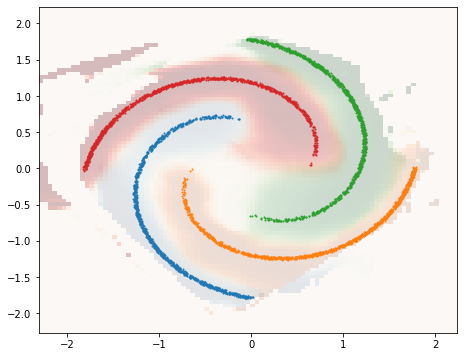

Best val_loss
epoch: 482 - train loss:     nan, val_loss:     nan, β: 1.48098, lr: 0.00010
epoch: 483 - train loss:     nan, val_loss:     nan, β: 1.48198, lr: 0.00010
epoch: 484 - train loss:     nan, val_loss:     nan, β: 1.48298, lr: 0.00010
epoch: 485 - train loss:     nan, val_loss:     nan, β: 1.48397, lr: 0.00010
epoch: 486 - train loss:     nan, val_loss:     nan, β: 1.48497, lr: 0.00010
epoch: 487 - train loss:     nan, val_loss:     nan, β: 1.48597, lr: 0.00010
epoch: 488 - train loss:     nan, val_loss:     nan, β: 1.48697, lr: 0.00010
epoch: 489 - train loss:     nan, val_loss:     nan, β: 1.48797, lr: 0.00010
epoch: 490 - train loss:     nan, val_loss:     nan, β: 1.48896, lr: 0.00010
epoch: 491 - train loss:     nan, val_loss:     nan, β: 1.48996, lr: 0.00010
epoch: 492 - train loss:     nan, val_loss:     nan, β: 1.49096, lr: 0.00010
epoch: 493 - train loss:     nan, val_loss:     nan, β: 1.49196, lr: 0.00010
epoch: 494 - train loss:     nan, val_loss:     nan, β: 1.4929

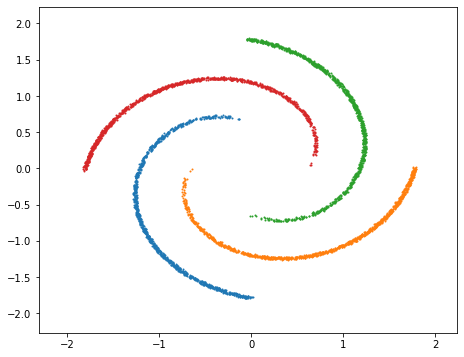

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,█▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/loss,█▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
β,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
best_epoch,481
best_val_loss,0.00104
epoch,501
learning_rate,0.0001
β,1.49994


In [9]:
state, best_state = train_loop(
    model, state, config, rng, make_loss, make_loss, train_loader, val_loader,
    # test_loader,
    wandb_kwargs={
        # 'mode': 'offline',
        # 'notes': '',
    },
    plot_fn=make_plots
)

## Paper plot

In [23]:
text_width = 6.75133 # in  --> Confirmed with template explanation
line_width = 3.25063
dpi = 200

fs_m1 = 7  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9 #  figure titles

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font', **{'family':'serif', 'serif': ['Palatino']})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

/tmp/ipykernel_3528339/2891865125.py:20: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


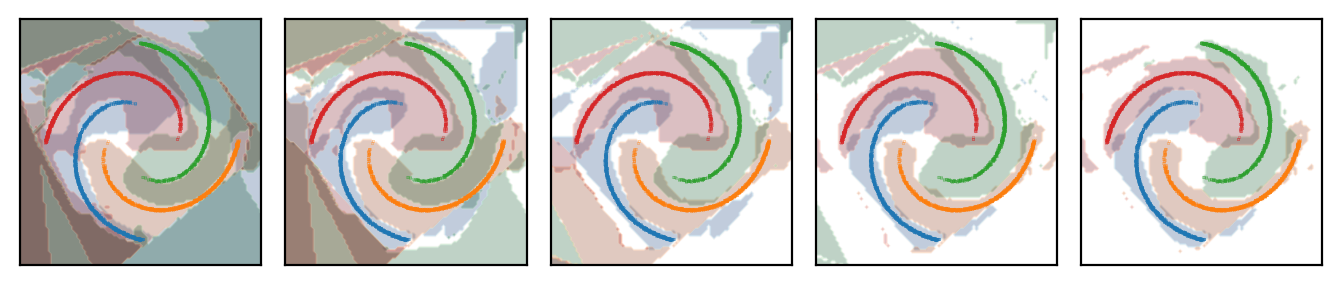

In [24]:
fig, axs = plt.subplots(1, 5, figsize=(text_width, text_width/4.6), dpi=dpi, sharey=True, sharex=True, layout='tight')

hard_ovr_params, hard_ovr_model_state = best_state.params, best_state.model_state

n_class = int(y_train.max()) + 1

# hard_ovr preds
h = .05  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() * 1.25, X_train[:, 0].max() * 1.25
y_min, y_max = X_train[:, 1].min() * 1.25, X_train[:, 1].max() * 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
xs = np.c_[xx.ravel(), yy.ravel()]

pred_fun = partial(
    model.apply,
    {"params": hard_ovr_params, **hard_ovr_model_state},
    train=False, return_ens_preds=True, β=best_state.β, hard_pred = True,
    method=model.pred
)

_, ens_preds = jax.vmap(
    pred_fun, out_axes=(0, 1), in_axes=(0,), axis_name="batch"
)(xs)



colormaps = ['Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

for j in range(ens_preds.shape[0]):
    preds = ens_preds[:j+1].prod(axis=0)

    for i in range(n_class):
        f = preds[:, i].reshape(xx.shape)
        step = 0.05
        max = np.amax(f)
        min = np.amin(f)
        levels = np.arange(min, max, step) + step
        axs[j].contourf(xx, yy, f, levels, alpha=0.25, cmap=colormaps[i], antialiased=True)

    # for i in range(depth + 1):
    #     axs[j].contour(xx, yy, ens_preds[:, i, 0].reshape(xx.shape), cmap=plt.cm.gray, levels=[.5], alpha=0.3)

    markers = ['o', 'v', 's', 'P', 'X']
    for i in range(n_class):
        idxs = (y_train == i)
        axs[j].plot(X_train[idxs[:, 0], 0], X_train[idxs[:, 0], 1], markers[0], c=f'C{i}', alpha=1, ms=0.1)
    axs[j].tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.savefig('spiral_evolution.pdf', dpi=dpi, bbox_inches='tight')    